In [1]:
import xgcm
import xmitgcm
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Use Distributed Client
So I can monitor what's going on.

Note that the cluster has already been created on the command line:

    dask-scheduler --port 9786 &
    dask-worker --nprocs=16 --nthreads=1 --nanny --memory-limit 0.5 tcp://129.236.21.48:9786 &
    
Now we just connect to it.

In [4]:
from distributed import Client
client = Client('tcp://129.236.21.48:9786')
client

Client Scheduler: tcp://129.236.21.48:9786 Dashboard: http://129.236.21.48:8787/status,Cluster Workers: 16 Cores: 16 Memory: 8655.10 GB


## Read Some LLC1080 Data

I found it works best here if I manually specify the timesteps and variables to read.

In [5]:
prefixes = ['PHL2tave', 'TTtave', 'UStave', 'sFluxtave', 'wVeltave', 'QNETtave',
            'AREAtave', 'FVtave', 'hVtave', 'DiagGAD-T', 'vVeltave', 'UICEtave',
            'PhHytave', 'tFluxtave', 'HEFFtave', 'DiagGAD-S', 'vZtave', 'Eta2tave',
            'hUtave', 'uVeltave', 'Ttave', 'DiagSurf', 'VICEtave', 'uFluxtave',
            'PHLtave', 'VVtave', 'VTtave', 'EmPmRtave', 'FUtave', 'QSWtave',
            'UUtave', 'WStave', 'UTtave', 'UVtave', 'VStave', 'WTtave', 'vFluxtave',
            'Tdiftave', 'Convtave', 'uZtave', 'Stave', 'ETAtave']

In [6]:
ddir = '/swot/SUM04/llc1080/run_notides/'
iters = [163800, 174600, 185760, 196560, 207720, 218880, 229680]
ds = xmitgcm.open_mdsdataset(ddir,
                             iters=iters, prefix=prefixes,
                             delta_t=240, ref_date='2011-01-1',
                             ignore_unknown_vars=True,
                             geometry='llc', llc_method='smallchunks')
ds

/home/rpa/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/rpa/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:    (face: 13, i: 1080, i_g: 1080, j: 1080, j_g: 1080, k: 90, k_l: 90, k_p1: 91, k_u: 90, time: 7)
Coordinates:
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (face, j, i) >f4 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    YC         (face, j, i) >f4 dask.array<shape=(13, 1080, 1080), ch

## Load the SST

In [8]:
sst = ds.THETA[0,0].load()
sst

<xarray.DataArray 'THETA' (face: 13, j: 1080, i: 1080)>
array([[[  0.      ,   0.      , ...,   0.      ,   0.      ],
        [  0.      ,   0.      , ...,   0.      ,   0.      ],
        ..., 
        [  4.136704,   4.164236, ...,   1.98121 ,   1.995022],
        [  4.133548,   4.153661, ...,   1.98182 ,   1.991334]],

       [[  4.131049,   4.147298, ...,   1.986344,   1.989604],
        [  4.128901,   4.144009, ...,   1.990973,   1.992222],
        ..., 
        [ 25.24519 ,  25.206903, ...,  25.970949,  25.994682],
        [ 25.244499,  25.202776, ...,  26.066996,  26.095501]],

       ..., 
       [[ 23.7654  ,  23.786936, ...,   4.107615,   4.145351],
        [ 23.768225,  23.792816, ...,   4.153807,   4.174059],
        ..., 
        [ 25.30937 ,  25.304605, ...,   4.15745 ,   4.147601],
        [ 25.284986,  25.283543, ...,   4.131232,   4.127003]],

       [[  4.171247,   4.190748, ...,   0.      ,   0.      ],
        [  4.187871,   4.19925 , ...,   0.      ,   0.      ],
 

In [9]:
surf_mask_c = ds.hFacC[0].load()

In [10]:
plt.rcParams['figure.figsize'] = (15,10)

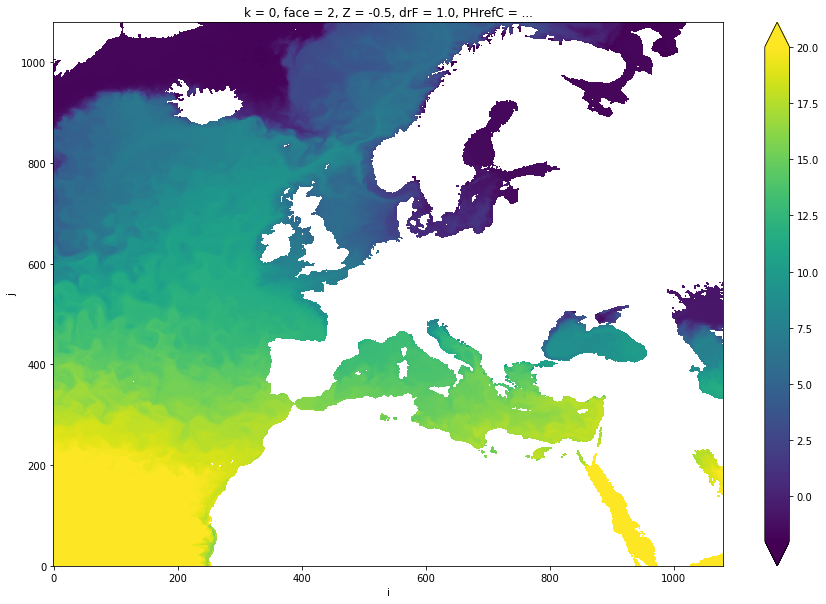

In [11]:
sst.where(surf_mask_c).sel(face=2).plot(vmin=-2, vmax=20)

## Quick and Dirty Global Plotting Function

In [7]:
def quick_llc_plot(data, axis_off=False, **kwargs):
    face_to_axis = {0: (2, 0), 1: (1, 0), 2: (0, 0),
                    3: (2, 1), 4: (1, 1), 5: (0, 1),
                    7: (0, 2), 8: (1, 2), 9: (2, 2),
                    10: (0, 3), 11: (1, 3), 12: (2, 3)}
    transpose = [7, 8, 9, 10, 11, 12]
    gridspec_kw = dict(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    fig, axes = plt.subplots(nrows=3, ncols=4, gridspec_kw=gridspec_kw)
    for face, (j, i) in face_to_axis.items():
        data_ax = data.sel(face=face)
        ax = axes[j,i]
        yincrease = True
        if face in transpose:
            data_ax = data_ax.transpose()
            yincrease = False
        data_ax.plot(ax=ax, yincrease=yincrease, **kwargs)
        if axis_off:
            ax.axis('off')
        ax.set_title('')

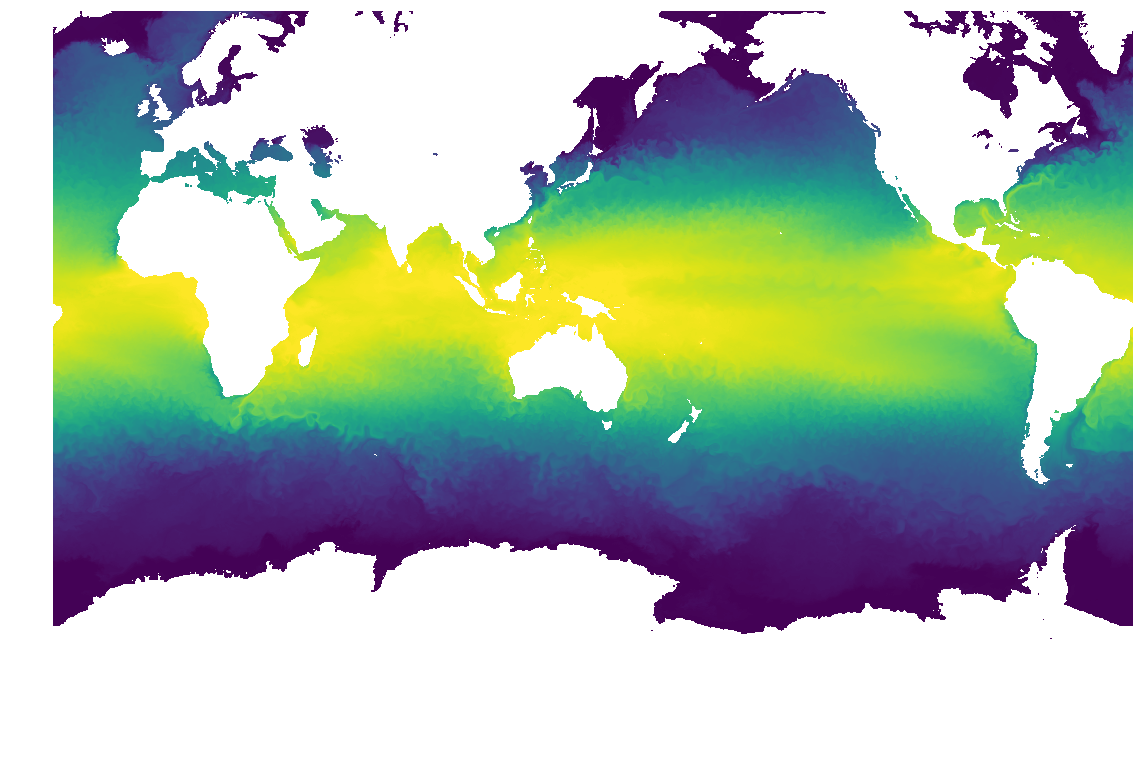

In [12]:
quick_llc_plot(sst.where(surf_mask_c), axis_off=True, vmin=-2, vmax=30, add_colorbar=False)

## Use xgcm to do some interpolation and gradients

In [13]:
import xgcm

In [14]:
face_connections = {'face':  {0: {'X': ((12, 'Y', False), (3, 'X', False)),
                                  'Y': (None, (1, 'Y', False))},
                              1: {'X': ((11, 'Y', False), (4, 'X', False)),
                                  'Y': ((0, 'Y', False), (2, 'Y', False))},
                              2: {'X': ((10, 'Y', False), (5, 'X', False)),
                                  'Y': ((1, 'Y', False), (6, 'X', False))},
                              3: {'X': ((0, 'X', False), (9, 'Y', False)),
                                  'Y': (None, (4, 'Y', False))},
                              4: {'X': ((1, 'X', False), (8, 'Y', False)),
                                  'Y': ((3, 'Y', False), (5, 'Y', False))},
                              5: {'X': ((2, 'X', False), (7, 'Y', False)),
                                  'Y': ((4, 'Y', False), (6, 'Y', False))},
                              6: {'X': ((2, 'Y', False), (7, 'X', False)),
                                  'Y': ((5, 'Y', False), (10, 'X', False))},
                              7: {'X': ((6, 'X', False), (8, 'X', False)),
                                  'Y': ((5, 'X', False), (10, 'Y', False))},
                              8: {'X': ((7, 'X', False), (9, 'X', False)),
                                  'Y': ((4, 'X', False), (11, 'Y', False))},
                              9: {'X': ((8, 'X', False), None),
                                  'Y': ((3, 'X', False), (12, 'Y', False))},
                              10: {'X': ((6, 'Y', False), (11, 'X', False)),
                                   'Y': ((7, 'Y', False), (2, 'X', False))},
                              11: {'X': ((10, 'X', False), (12, 'X', False)),
                                   'Y': ((8, 'Y', False), (1, 'X', False))},
                              12: {'X': ((11, 'X', False), None),
                                   'Y': ((9, 'Y', False), (0, 'X', False))}}}

In [15]:
grid = xgcm.Grid(ds, face_connections=face_connections)
grid

<xgcm.Grid>
Z Axis (periodic):
  * center   k (90) --> left
  * left     k_l (90) --> center
  * outer    k_p1 (91) --> center
  * right    k_u (90) --> center
T Axis (periodic):
  * center   time (7)
X Axis (periodic):
  * center   i (1080) --> left
  * left     i_g (1080) --> center
Y Axis (periodic):
  * center   j (1080) --> left
  * left     j_g (1080) --> center

## To do the kinetic energy, we need to interpolate velocity to the center points

In [16]:
uu_surf = ds.UUtave[0,0].load()
vv_surf = ds.VVtave[0,0].load()

In [17]:
vector_interp = grid.interp_2d_vector({'X': uu_surf, 'Y': vv_surf}, boundary='extend')
ke = 0.5*(vector_interp['X'] + vector_interp['Y'])

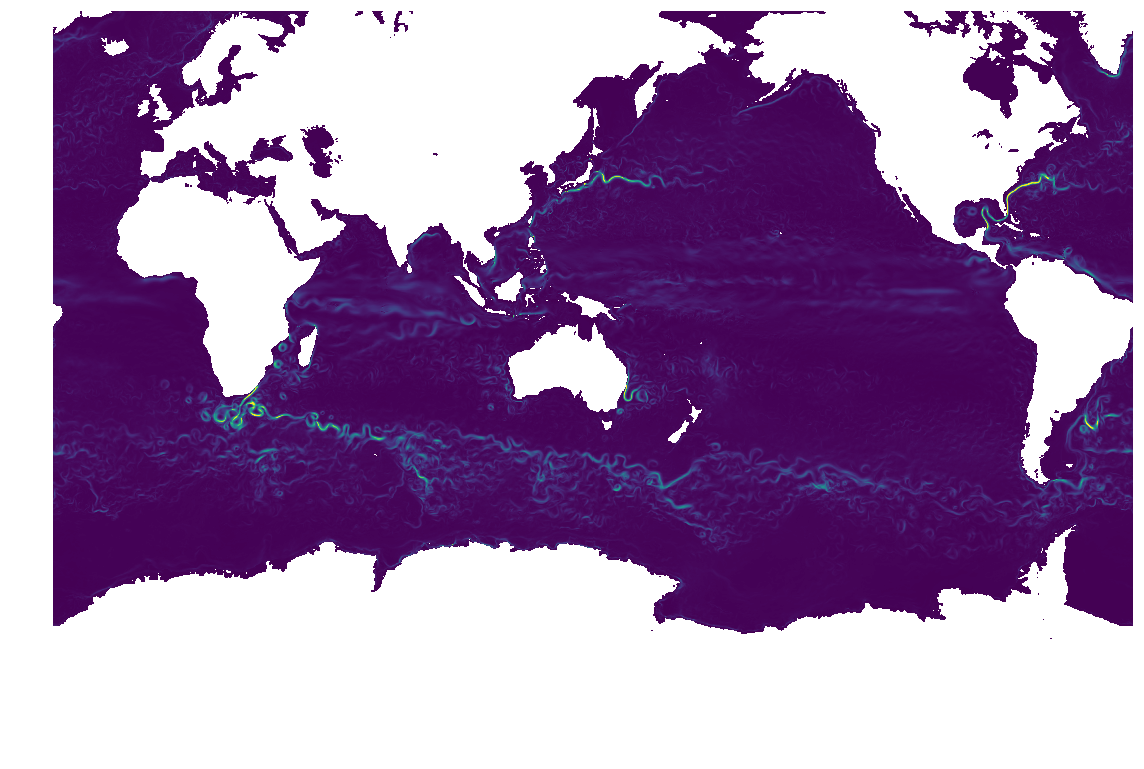

In [18]:
quick_llc_plot(ke.where(surf_mask_c), axis_off=True, add_colorbar=False, vmax=1, vmin=0)

## RMS SST Gradient

Note that in this example we operate on the whole variable (`ds.THETA`) *before* loading into memory. xgcm works lazily.

In [19]:
dtdx = grid.diff(ds.THETA, 'X', boundary='extend') / ds.dxC * (ds.hFacW>0)
dtdy = grid.diff(ds.THETA, 'Y', boundary='extend') / ds.dyC * (ds.hFacS>0)
grad_vector = grid.interp_2d_vector({'X': dtdx, 'Y': dtdy}, boundary='extend')
grad_theta_sq = grad_vector['X']**2 + grad_vector['Y']**2
grad_theta_sq

<xarray.DataArray (time: 7, k: 90, face: 13, j: 1080, i: 1080)>
dask.array<shape=(7, 90, 13, 1080, 1080), dtype=float32, chunksize=(1, 1, 1, 1, 1)>
Coordinates:
  * time     (time) datetime64[ns] 2012-03-31 2012-04-30 2012-05-31 ...
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...

In [20]:
grad_surf = grad_theta_sq[0,0].where(surf_mask_c).load()

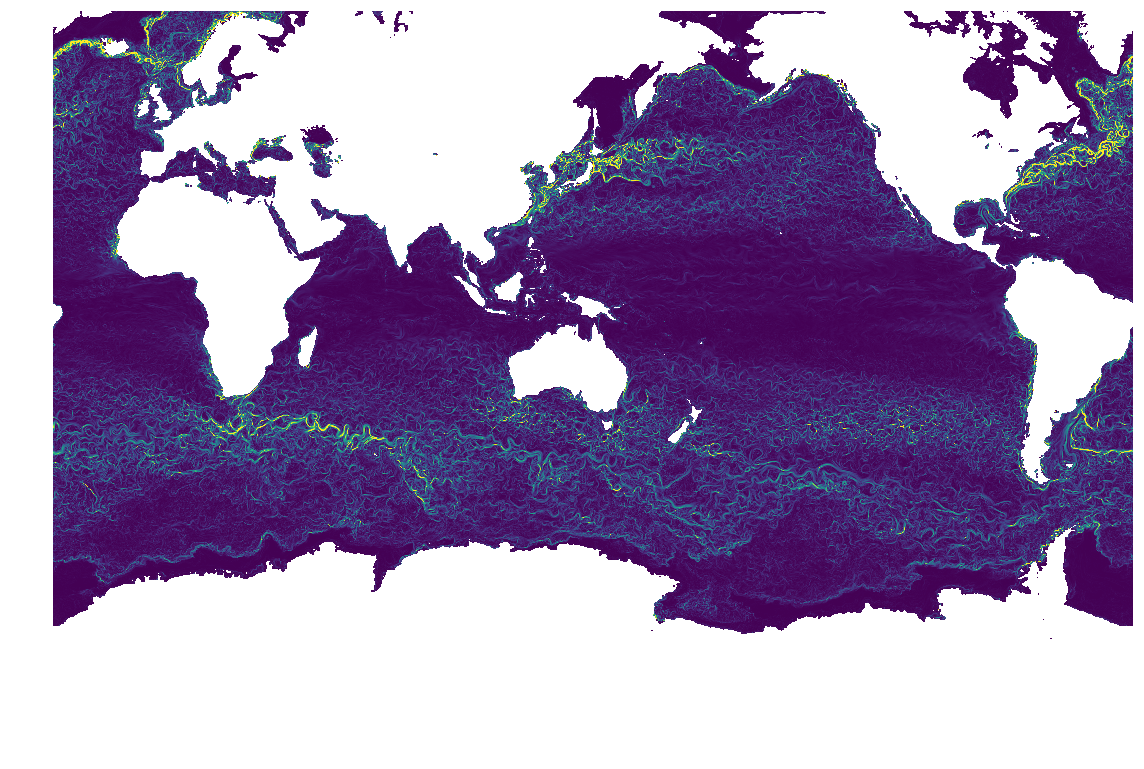

In [21]:
quick_llc_plot(grad_surf**0.5, axis_off=True, add_colorbar=False, vmax=1e-4, vmin=0)

## Below are some random experiments related to dask performance

There is clearly room to optimize.

Feel free to ignore.

In [29]:
%time grad_theta_sq[0,:15].mean().load()

CPU times: user 5.7 s, sys: 203 ms, total: 5.91 s
Wall time: 24.1 s


<xarray.DataArray ()>
array(3.495261302610686e-10, dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-03-31

In [30]:
%time grad_theta_sq[0,:30].mean().load()

CPU times: user 15.5 s, sys: 1.13 s, total: 16.6 s
Wall time: 46.9 s


<xarray.DataArray ()>
array(4.041501300289241e-10, dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-03-31

In [32]:
%time grad_theta_sq[0,:90].mean().load()

CPU times: user 36.9 s, sys: 1.31 s, total: 38.2 s
Wall time: 2min 3s


<xarray.DataArray ()>
array(1.6638637689858626e-10, dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-03-31

In [34]:
%time grid.diff(ds.THETA[0, 0], 'X', boundary='fill').load()

CPU times: user 208 ms, sys: 43.9 ms, total: 252 ms
Wall time: 596 ms


<xarray.DataArray 'sub-eb9744ddcb906850c698b3700ab1b598' (face: 13, j: 1080, i_g: 1080)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ..., 
        [ 0.008356,  0.027532, ...,  0.001033,  0.013812],
        [ 0.007565,  0.020113, ..., -0.005124,  0.009514]],

       [[ 0.004046,  0.016249, ..., -0.001829,  0.003261],
        [-0.002331,  0.015108, ..., -0.000917,  0.001249],
        ..., 
        [-0.038353, -0.038286, ...,  0.012638,  0.023733],
        [-0.040487, -0.041723, ...,  0.023703,  0.028505]],

       ..., 
       [[ 0.023199,  0.021536, ...,  0.022255,  0.037736],
        [ 0.024323,  0.024591, ...,  0.031718,  0.020252],
        ..., 
        [-0.002831, -0.004765, ..., -0.004922, -0.009849],
        [-0.000631, -0.001444, ..., -0.007061, -0.00423 ]],

       [[ 0.025896,  0.019501, ...,  0.      ,  0.      ],
        [ 0.013813,  0.011379, ...,  0.      ,  0.      ],
        ..., 
        [-

In [36]:
%time grid.diff(sst, 'X', boundary='fill').load()

CPU times: user 55.2 ms, sys: 29.1 ms, total: 84.3 ms
Wall time: 81.3 ms


<xarray.DataArray (face: 13, j: 1080, i_g: 1080)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ..., 
        [ 0.008356,  0.027532, ...,  0.001033,  0.013812],
        [ 0.007565,  0.020113, ..., -0.005124,  0.009514]],

       [[ 0.004046,  0.016249, ..., -0.001829,  0.003261],
        [-0.002331,  0.015108, ..., -0.000917,  0.001249],
        ..., 
        [-0.038353, -0.038286, ...,  0.012638,  0.023733],
        [-0.040487, -0.041723, ...,  0.023703,  0.028505]],

       ..., 
       [[ 0.023199,  0.021536, ...,  0.022255,  0.037736],
        [ 0.024323,  0.024591, ...,  0.031718,  0.020252],
        ..., 
        [-0.002831, -0.004765, ..., -0.004922, -0.009849],
        [-0.000631, -0.001444, ..., -0.007061, -0.00423 ]],

       [[ 0.025896,  0.019501, ...,  0.      ,  0.      ],
        [ 0.013813,  0.011379, ...,  0.      ,  0.      ],
        ..., 
        [-0.009979, -0.004838, ...,  0.      ,  0

In [40]:
theta_rechunk = ds.THETA.chunk(chunks={'time': 1, 'k': 1, 'face': 13})
theta_rechunk

<xarray.DataArray 'THETA' (time: 7, k: 90, face: 13, j: 1080, i: 1080)>
dask.array<shape=(7, 90, 13, 1080, 1080), dtype=float32, chunksize=(1, 1, 13, 1080, 1080)>
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) >f4 dask.array<shape=(13, 1080, 1080), chunksize=(13, 1080, 1080)>
    YC       (face, j, i) >f4 dask.array<shape=(13, 1080, 1080), chunksize=(13, 1080, 1080)>
    Z        (k) float32 dask.array<shape=(90,), chunksize=(1,)>
    rA       (face, j, i) >f4 dask.array<shape=(13, 1080, 1080), chunksize=(13, 1080, 1080)>
    Depth    (face, j, i) >f4 dask.array<shape=(13, 1080, 1080), chunksize=(13, 1080, 1080)>
    drF      (k) float32 dask.array<shape=(90,), chunksize=(1,)>
    PHrefC   (k) float32 da

In [45]:
%time grid.diff(theta_rechunk[0], 'X', boundary='fill').mean().load()

CPU times: user 5.63 s, sys: 246 ms, total: 5.87 s
Wall time: 25.3 s


<xarray.DataArray 'sub-768f2ff9e8f306319545b53ab7d6d42d' ()>
array(-0.00044905711547471583, dtype=float32)

In [46]:
%time grid.diff(ds.THETA[0], 'X', boundary='fill').mean().load()

CPU times: user 3.74 s, sys: 49.1 ms, total: 3.79 s
Wall time: 19.3 s


<xarray.DataArray 'sub-5a15e0a92683711cee27501fe8001f86' ()>
array(-0.00044905711547471583, dtype=float32)

In [55]:
ds.THETA.mean().load()

<xarray.DataArray 'THETA' ()>
array(2.940178871154785, dtype=float32)

In [57]:
# why are there so many dask chunks here?
len(ds.THETA.data.dask) / (7*90*13)

16.0